#### Prepare the data

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
#scikit is an open source data analysis library, and the gold standard for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the data
bikes = pd.read_csv('../data/bikes_with_bins.csv', index_col='datetime', parse_dates=True)

In [3]:
# show the head of the data
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,January,Saturday,2011,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,January,Saturday,2011,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,January,Saturday,2011,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,January,Saturday,2011,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,January,Saturday,2011,night


#### Check the number of weather types

In [5]:
# Print unique weather types
bikes['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

#### Create a dataframe with weather related data only ('temp', 'atemp', 'humidity', 'windspeed')

In [6]:
# Create a new dataframe with given columns
weather = bikes[['temp', 'atemp', 'humidity', 'windspeed']]
weather.sample(10)

,temp,atemp,humidity,windspeed
datetime,,,,
2012-09-27 15:00:00,31.16,34.090,45,0.0000
2011-01-21 18:00:00,4.92,6.060,30,16.9979
2012-05-29 07:00:00,27.06,30.305,78,15.0013
2012-01-31 06:00:00,11.48,13.635,52,11.0014
2012-11-19 12:00:00,16.40,20.455,62,19.0012
2011-12-19 17:00:00,15.58,19.695,46,12.9980
2012-11-18 03:00:00,12.30,15.150,81,11.0014
2012-06-05 01:00:00,21.32,25.000,77,22.0028
2011-07-13 10:00:00,33.62,37.880,46,12.9980


#### Check the data distribution and standardize it if needed

In [7]:
# Run describe function on df_num
weather.describe()

,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


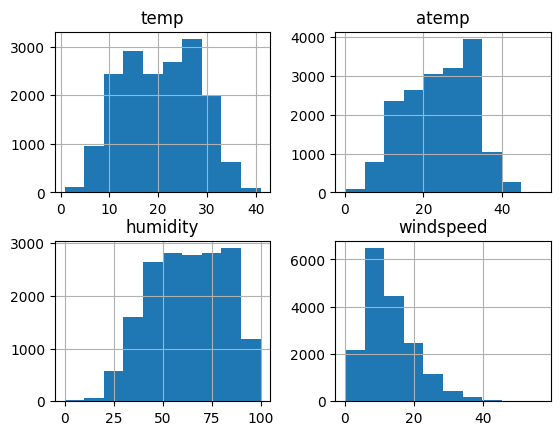

In [9]:
weather.hist();

In [12]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(weather)

weather_scaled = scaler.transform(weather)
weather_scaled

array([[-1.33464759, -1.0932806 ,  0.9473725 , -1.55388851],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, -0.21169121],
       [-1.23077877, -1.18173227, -0.34847267, -0.45609864],
       [-1.23077877, -1.18173227,  0.11803159, -0.45609864]])

In [13]:
# Make a dataframe from the scaled data
weather_scaled_df = pd.DataFrame(weather_scaled, columns=weather.columns)
weather_scaled_df.head()

,temp,atemp,humidity,windspeed
0,-1.334648,-1.093281,0.947372,-1.553889
1,-1.438516,-1.181732,0.895539,-1.553889
2,-1.438516,-1.181732,0.895539,-1.553889
3,-1.334648,-1.093281,0.636370,-1.553889
4,-1.334648,-1.093281,0.636370,-1.553889


#### Use the elbow method to determine the number of clusters

C:\Users\anast\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anast\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anast\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anast\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anast\miniconda3\lib\site-packages\sklearn\

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

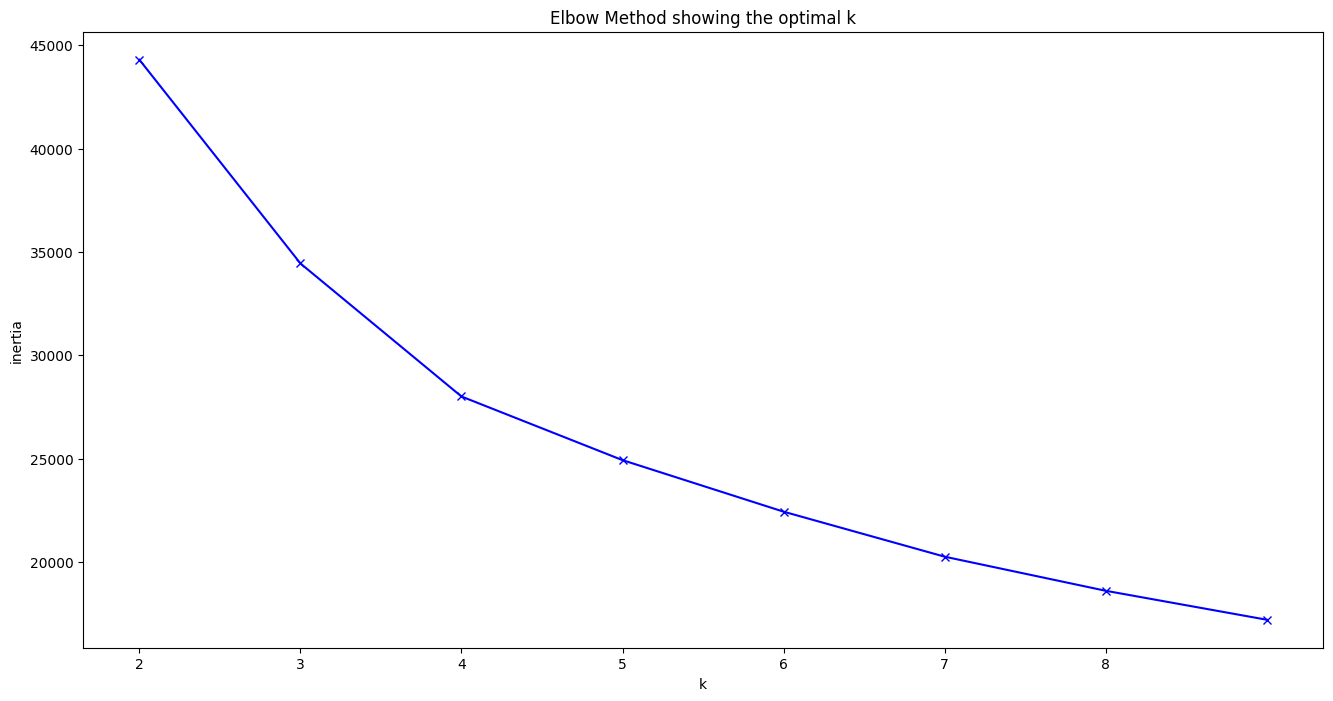

In [14]:
# Use the code from the encounter and adapt it to implement the elbow method

K = range(2, 10) # we know that there is 4 weather types, let the max number of clusters to be 10 in this loop
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(weather_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

You should see a light elbow for k = 4 which fits our knowledge of the dataset.

### Repeat k-means clustering with k = 4. Visualize the results and compare them with the weather from the `weather` column. Are the results aligned or rather different?

In [15]:
# Predict the labels and visualize the data. Adapt the code from the encounter.
# Note: in the encounter notebook we are only visualizing data in a 2 dimensional space 
# which means we are using only two columns (you can select column 1 - 'atemp' and column 2 - 'humidity')

kmeans = KMeans(n_clusters=4, random_state=42) # https://scikit-learn.org/stable/glossary.html#term-random_state
kmeans.fit(weather_scaled_df)

#kmeans.inertia_
clusters = kmeans.predict(weather_scaled_df)
clusters

C:\Users\anast\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2])

In [32]:
weather_clustered = weather.copy()
weather_clustered['cluster'] = clusters
weather_clustered['cluster'] = weather_clustered['cluster'] + 1
weather_clustered['weather'] = bikes['weather']
weather_clustered

,temp,atemp,humidity,windspeed,cluster,weather
datetime,,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,3,1
2011-01-01 01:00:00,9.02,13.635,80,0.0000,3,1
2011-01-01 02:00:00,9.02,13.635,80,0.0000,3,1
2011-01-01 03:00:00,9.84,14.395,75,0.0000,3,1
2011-01-01 04:00:00,9.84,14.395,75,0.0000,3,1
...,...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,3,2
2012-12-31 20:00:00,10.66,12.880,60,11.0014,3,2
2012-12-31 21:00:00,10.66,12.880,60,11.0014,3,1


In [20]:
weather_clustered.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'cluster', 'weather'], dtype='object')

# I M P O R T A N T

Important for conecting cluster_value with weather_type:

In [33]:
weather_clustered['cluster'].unique(), weather_clustered['weather'].unique()

(array([3, 1, 2, 4]), array([1, 2, 3, 4], dtype=int64))

## Plotting

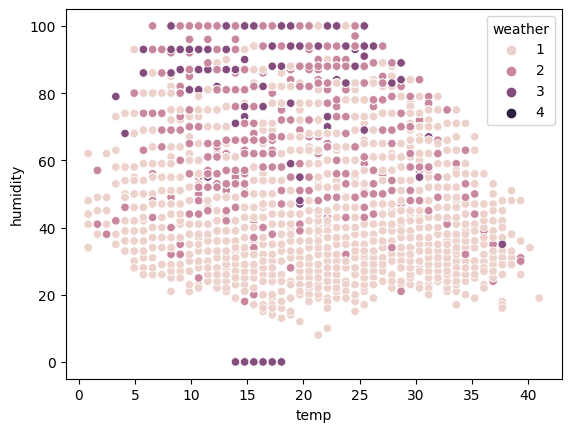

In [45]:
# plotting 'temp', 'humidity' based on CLUSTERS
sns.scatterplot(data=weather_clustered, x="temp", y="humidity", hue="weather");

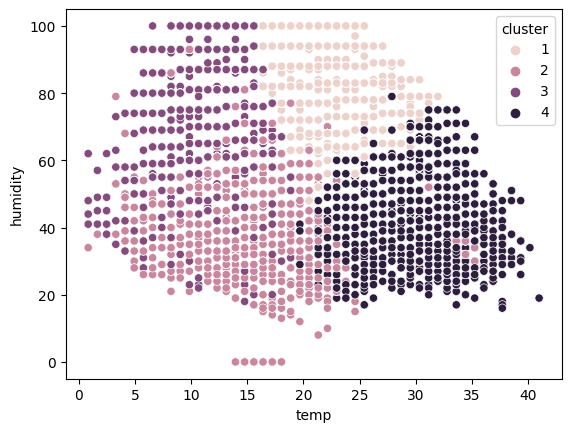

In [46]:
# plotting 'temp', 'humidity' based on WEATHER
sns.scatterplot(data=weather_clustered, x="temp", y="humidity", hue="cluster");

### Conclusions:

1. Clustering devides items by groups which are quite similar in size.
   Especially if the dataset has equal distribution through the interval.
    
2. Parameter border values to define particular weather type are explicitly stated.
   And could consist of a few intervals (like extremely cold temperature and extremely warm temperature.)
   It means the weather type is calculated clearly (unambiguously).
    
3. It is not obvios how realate Clusters with Weather types.
   Absolute values don't pass.

## Alternative plotting

In [34]:
# melting 'weather' dataset to plot boxplot for both 'cluster' and 'weather' values
weather_clustered_melteed = weather_clustered.melt(id_vars=['temp', 'atemp', 'humidity', 'windspeed'],
                                        value_vars=['cluster', 'weather'],
                                        var_name = 'cluster_src', 
                                        value_name= 'cluster_value',
                                        ignore_index=False
                                       )
weather_clustered_melteed.sample(10)

,temp,atemp,humidity,windspeed,cluster_src,cluster_value
datetime,,,,,,
2011-12-26 09:00:00,13.94,15.150,46,19.9995,cluster,2
2011-10-20 19:00:00,18.86,22.725,51,23.9994,cluster,2
2011-06-20 16:00:00,28.70,32.575,58,11.0014,cluster,4
2012-11-27 06:00:00,12.30,15.150,81,11.0014,cluster,3
2011-03-30 17:00:00,10.66,13.635,93,7.0015,weather,3
2012-03-14 16:00:00,29.52,31.820,25,12.9980,weather,1
2011-09-20 07:00:00,22.14,25.760,88,11.0014,cluster,1
2012-08-02 07:00:00,28.70,33.335,79,0.0000,cluster,1
2011-06-01 06:00:00,27.88,31.820,89,6.0032,weather,2


In [35]:
# melting 'weather' dataset to plot boxplot for both 'temp' and 'humidity' values
weather_clustered_melted = weather_clustered_melteed.melt(id_vars=['cluster_src', 'cluster_value', 'atemp', 'windspeed'],
                                        value_vars=['temp', 'humidity'],
                                        var_name = 'weather_type', 
                                        value_name= 'weather_value',
                                        ignore_index=False
                                       )
weather_clustered_melted.sample(10)

,cluster_src,cluster_value,atemp,windspeed,weather_type,weather_value
datetime,,,,,,
2012-01-21 17:00:00,weather,2,9.090,26.0027,temp,8.20
2012-08-16 12:00:00,weather,1,34.850,7.0015,temp,32.80
2011-12-07 14:00:00,cluster,1,21.970,12.9980,humidity,100.00
2011-09-14 10:00:00,cluster,1,32.575,8.9981,temp,28.70
2011-01-17 02:00:00,cluster,2,8.335,16.9979,temp,7.38
2011-03-02 01:00:00,weather,1,11.365,12.9980,humidity,69.00
2011-10-09 20:00:00,cluster,1,26.515,7.0015,humidity,73.00
2011-12-09 00:00:00,cluster,3,14.395,0.0000,temp,9.84
2011-08-05 06:00:00,weather,1,29.545,8.9981,temp,26.24


In [37]:
"""sns.displot(data=weather_clustered_melted, 
            x="cluster_value", y="weather_value", 
            hue="weather_type", 
            col="cluster_value", row="cluster_src"
           )
"""

'sns.displot(data=weather_clustered_melted, \n            x="cluster_value", y="weather_value", \n            hue="weather_type", \n            col="cluster_value", row="cluster_src"\n           )\n'

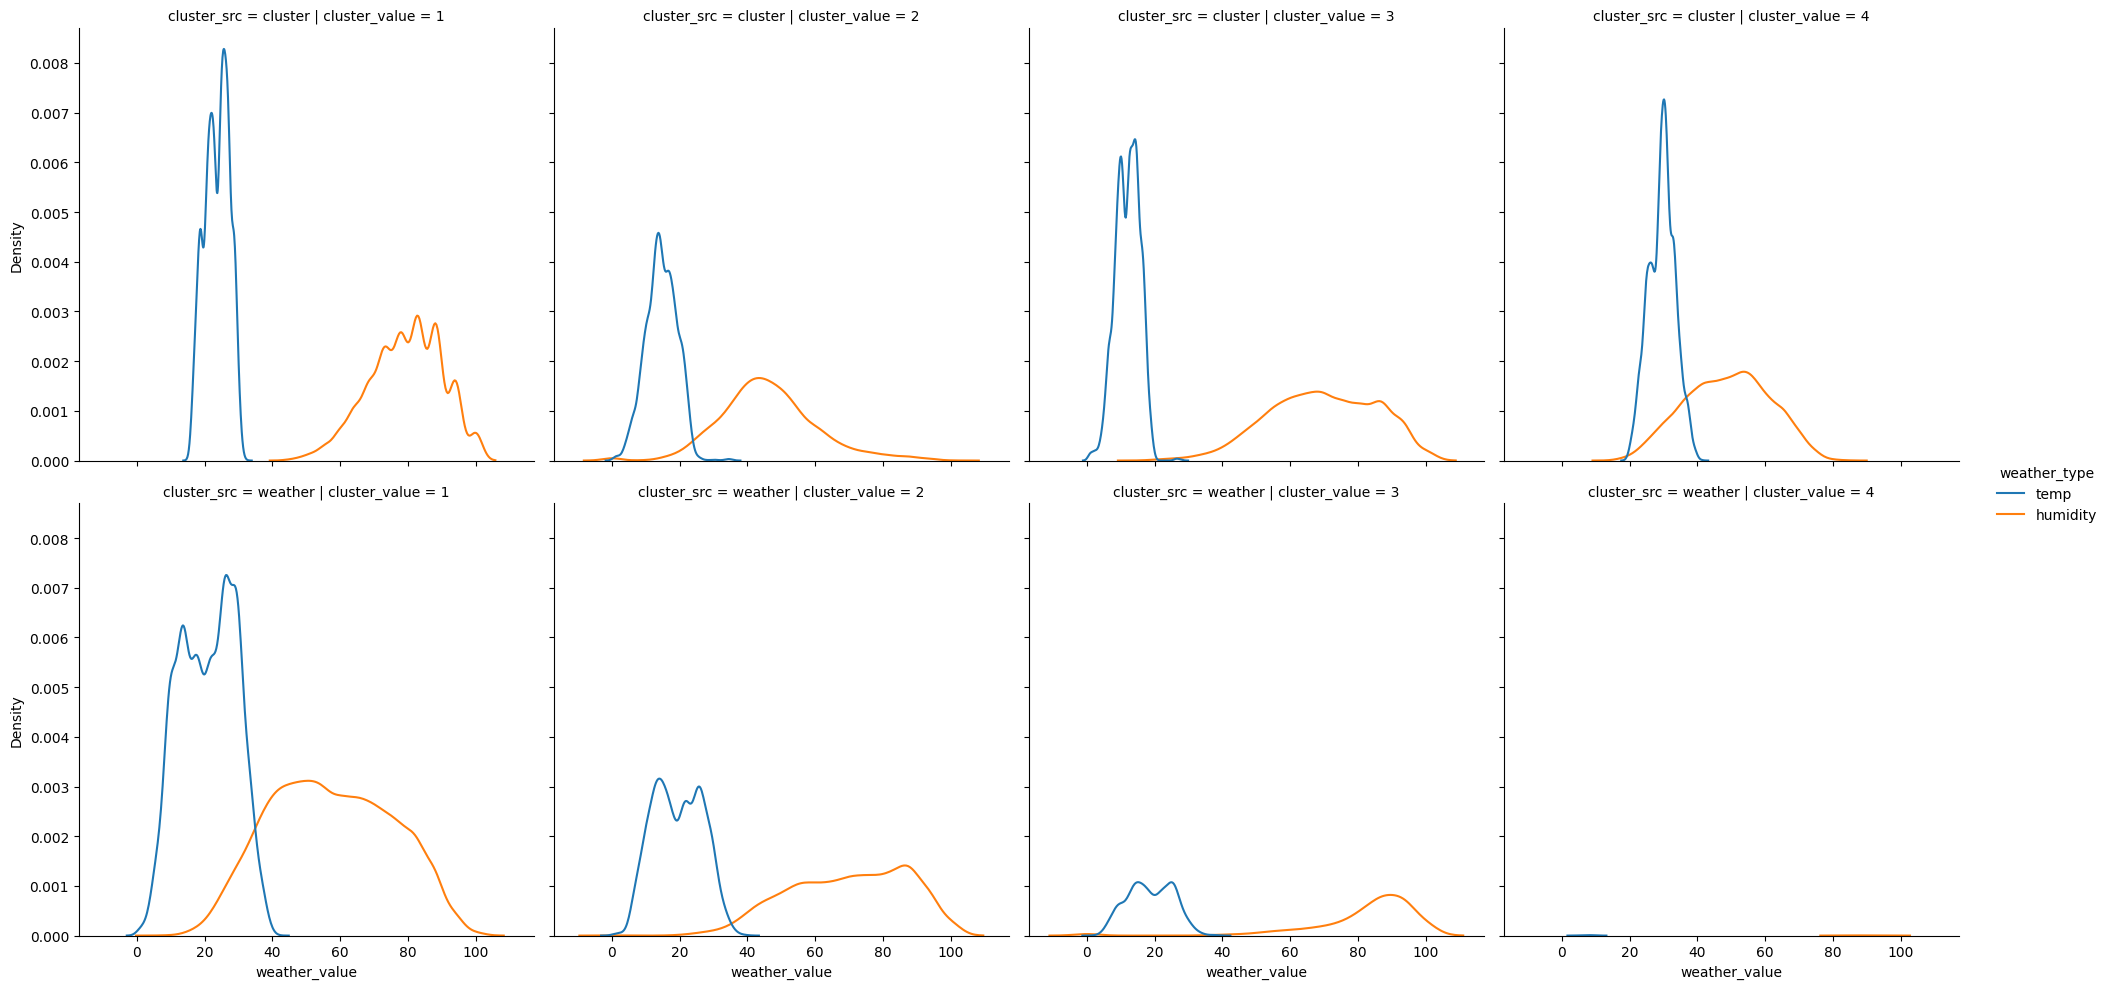

In [42]:
# horizontal ploting
sns.displot(data=weather_clustered_melted, 
            x="weather_value", 
            hue="weather_type", 
            col="cluster_value", row="cluster_src",
            kind="kde")

plt.savefig('../images/weather_clustering_horizontal.pdf')

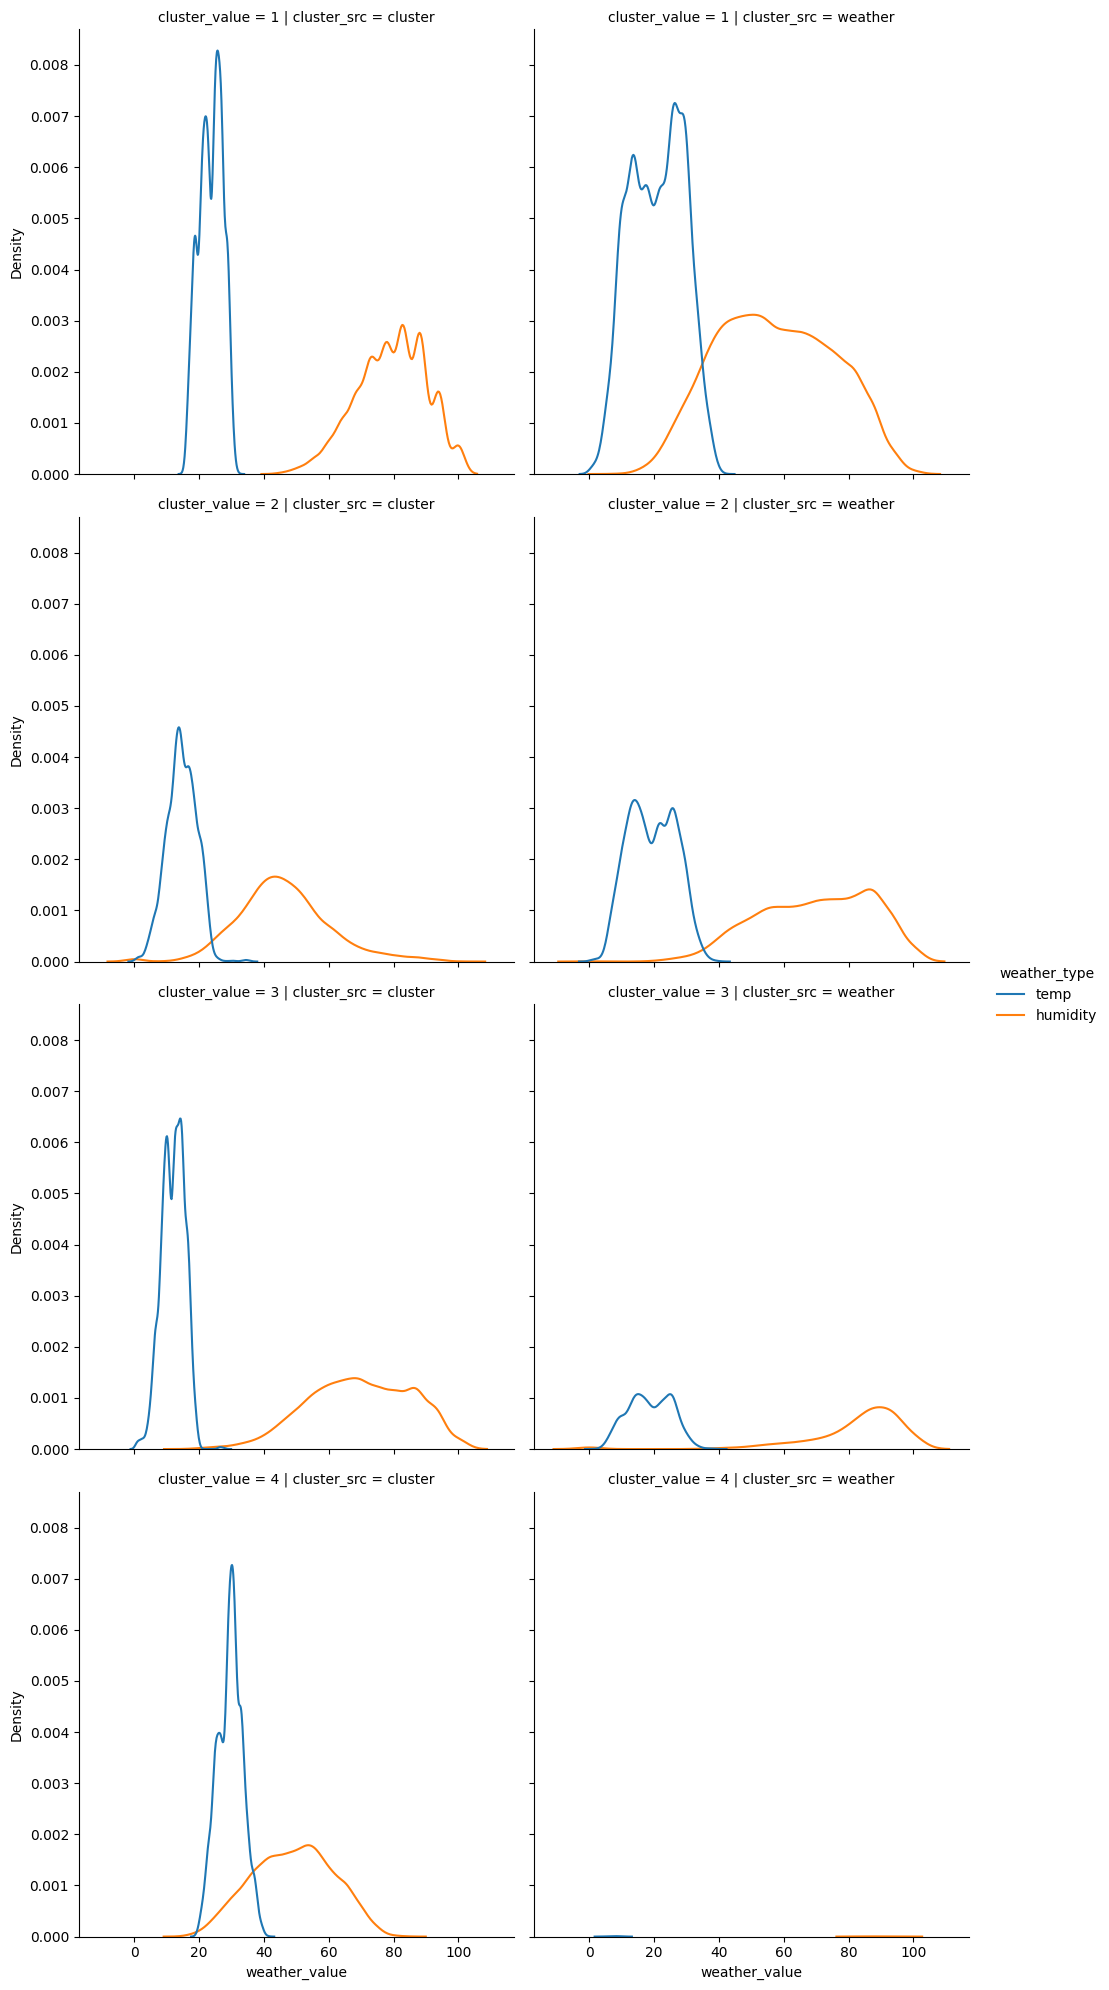

In [41]:
# vertical ploting
sns.displot(data=weather_clustered_melted, 
            x="weather_value", 
            hue="weather_type", 
            row="cluster_value", col="cluster_src",
            kind="kde")

plt.savefig('../images/weather_clustering.pdf')

In [ ]:
# visualising atemp and humidity per cluster


In [11]:
# Visualize the weather clusters that are already in the data.


#### Conclusions:

1. In this alternate ploting distributions of 'temp' and 'humidity' are different through the cluster values as well as through weather types. So visually particular cluster could not be related to particular weather type.

2. It looks like weather types are calculated in a very specific way.
   While clustering is more about deviding interval in sequental subsets of its values.
   So clustering could not relate extremely cold temperature to the same cluster as extreamely warm temperatures.